In [2]:
import numpy as np
import yfinance as yf
from pkg_resources import find_eggs_in_zip
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import torch

In [1]:
from kan import *

In [43]:
device = torch.device('cuda')

In [44]:
device

device(type='cuda')

In [19]:
ticker = "^GSPC"  # S&P 500
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [20]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2010-01-04 00:00:00+00:00,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05 00:00:00+00:00,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06 00:00:00+00:00,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07 00:00:00+00:00,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08 00:00:00+00:00,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,3844.820068,3844.820068,3845.800049,3797.010010,3815.110107,2819280000
2022-12-27 00:00:00+00:00,3829.250000,3829.250000,3846.649902,3813.219971,3843.340088,3030300000


In [21]:
data['return'] = data['Adj Close'].pct_change()  #daily returns
data['sma_50'] = data['Adj Close'].rolling(window=50).mean()  # 50 day ma
data['sma_200'] = data['Adj Close'].rolling(window=200).mean()  # 200 day ma
data = data.dropna()

In [22]:
X = data[['return', 'sma_50', 'sma_200']]
y = data['Adj Close'].shift(-1)  # next day's closing price

In [23]:
X = X[:-1]
y = y[:-1]

In [28]:
splitter = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

In [35]:
X

Price,return,sma_50,sma_200
Ticker,,,
Date,,,
2010-10-18 00:00:00+00:00,0.007244,1116.760398,1120.764647
2010-10-19 00:00:00+00:00,-0.015877,1117.522598,1120.929197
2010-10-20 00:00:00+00:00,0.010524,1118.664797,1121.137447
2010-10-21 00:00:00+00:00,0.001774,1120.480598,1121.353047
2010-10-22 00:00:00+00:00,0.002389,1122.469998,1121.559997
...,...,...,...
2022-12-22 00:00:00+00:00,-0.014452,3882.263613,4018.931815
2022-12-23 00:00:00+00:00,0.005868,3885.761816,4016.858315


In [34]:
y

Ticker,^GSPC
Date,
2010-10-18 00:00:00+00:00,1165.900024
2010-10-19 00:00:00+00:00,1178.170044
2010-10-20 00:00:00+00:00,1180.260010
2010-10-21 00:00:00+00:00,1183.079956
2010-10-22 00:00:00+00:00,1185.619995
...,...
2022-12-22 00:00:00+00:00,3844.820068
2022-12-23 00:00:00+00:00,3829.250000
2022-12-27 00:00:00+00:00,3783.219971


In [37]:
predictions = []
actuals = []
X_train, y_train, X_test, Y_test = [], [], [], []
for train_index, test_index in splitter.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [45]:
import matplotlib.pyplot as plt

In [50]:
data.columns

MultiIndex([('Adj Close', '^GSPC'),
            (    'Close', '^GSPC'),
            (     'High', '^GSPC'),
            (      'Low', '^GSPC'),
            (     'Open', '^GSPC'),
            (   'Volume', '^GSPC'),
            (   'return',      ''),
            (   'sma_50',      ''),
            (  'sma_200',      '')],
           names=['Price', 'Ticker'])

TypeError: 'method' object is not subscriptable

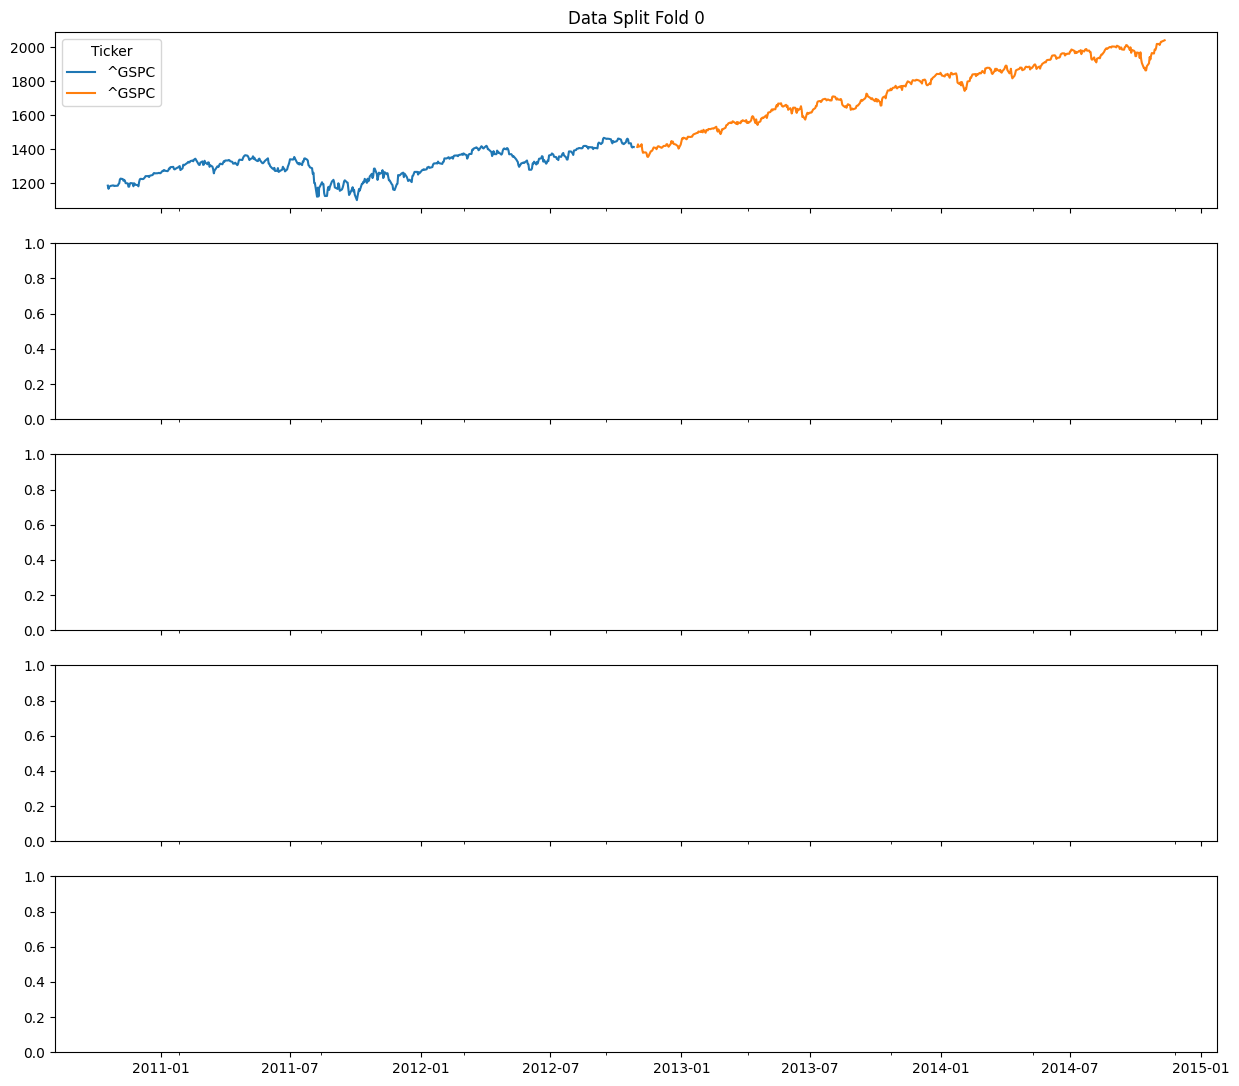

In [52]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
data = data.sort_index()
for train_idx, val_idx in splitter.split(data):
    train, val = data.iloc[train_idx], data.iloc[val_idx]

    train['Close'].plot(ax=axs[fold], label='train_set', title=f'Data Split Fold {fold}')
    val['Close'].plot(ax=axs[fold], label='test_set')

    model.fit(train.drop['Close'], train['Close'] )
    y_pred=model.predict(val.drop['Close'])
    y_pred.plot(ax=axs[fold], label='predictions')

    axs[fold].axvline(val.index.min(), color='black', ls='--')
    fold += 1

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
predictions.extend(y_pred)
actuals.extend(y_test.values)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for fold: {mse}')

Mean Squared Error for fold: 31294.110086807006


In [40]:
actuals

[array([3709.40991211]),
 array([3694.91992188]),
 array([3687.26000977]),
 array([3690.01000977]),
 array([3703.06005859]),
 array([3735.36010742]),
 array([3727.04003906]),
 array([3732.04003906]),
 array([3756.07006836]),
 array([3700.64990234]),
 array([3726.86010742]),
 array([3748.13989258]),
 array([3803.79003906]),
 array([3824.67993164]),
 array([3799.61010742]),
 array([3801.18994141]),
 array([3809.84008789]),
 array([3795.54003906]),
 array([3768.25]),
 array([3798.90991211]),
 array([3851.85009766]),
 array([3853.07006836]),
 array([3841.4699707]),
 array([3855.36010742]),
 array([3849.62011719]),
 array([3750.77001953]),
 array([3787.37988281]),
 array([3714.23999023]),
 array([3773.86010742]),
 array([3826.31005859]),
 array([3830.16992188]),
 array([3871.73999023]),
 array([3886.83007812]),
 array([3915.59008789]),
 array([3911.22998047]),
 array([3909.87988281]),
 array([3916.37988281]),
 array([3934.83007812]),
 array([3932.59008789]),
 array([3931.33007812]),
 array(

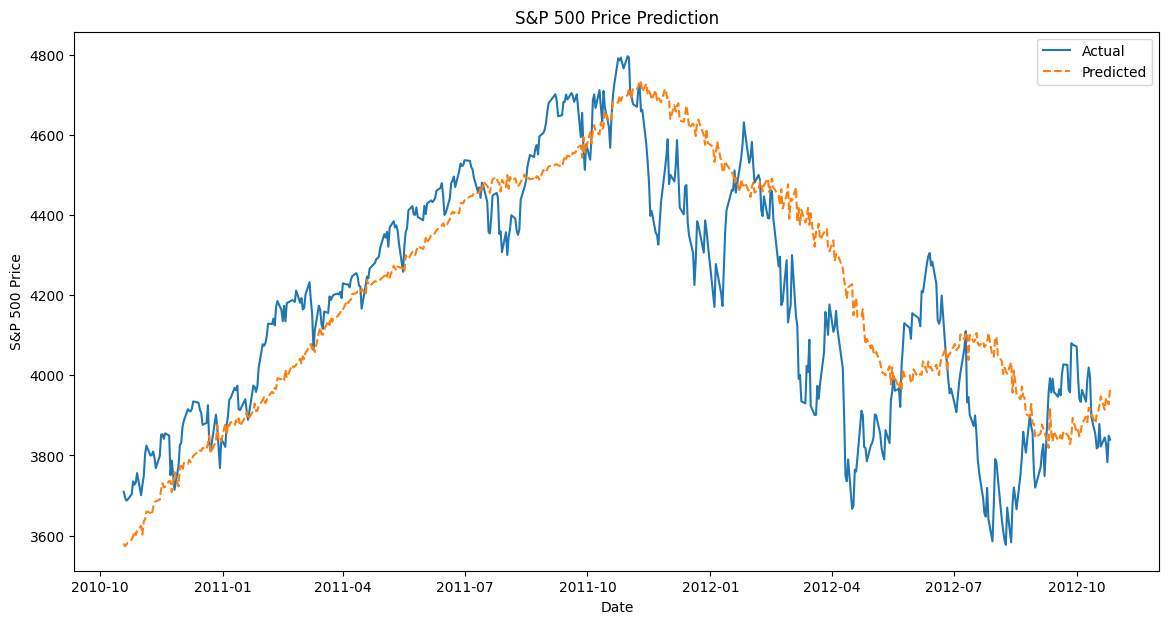

In [41]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[1:len(actuals) + 1], actuals, label='Actual')
plt.plot(data.index[1:len(predictions) + 1], predictions, label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.title('S&P 500 Price Prediction')
plt.legend()
plt.show()

In [ ]:
import tweepy
import vader
import praw

In [ ]:
import tweepy
import os
from dotenv import load_dotenv

auth = tweepy.OAuth1UserHandler(
    os.getenv("consumer_key"), os.getenv("consumer_secret"), os.getenv("access_token"), os.getenv("access_token_secret"))